In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Data Collection and Processing

In [2]:
data = pd.read_csv('heart_disease_data.csv')

In [3]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

###### 1 -> Defective heart
###### 0 -> Healthy heart

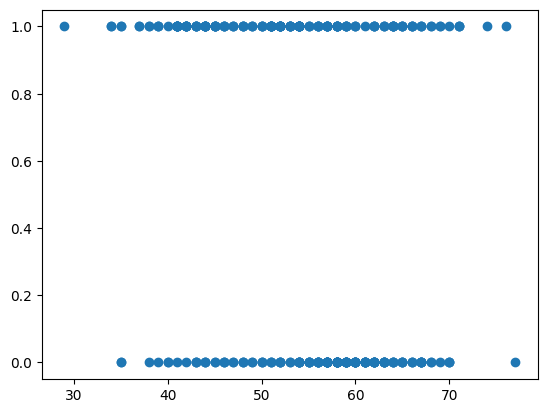

In [9]:
plt.scatter(x=data['age'] ,y=data['target'])

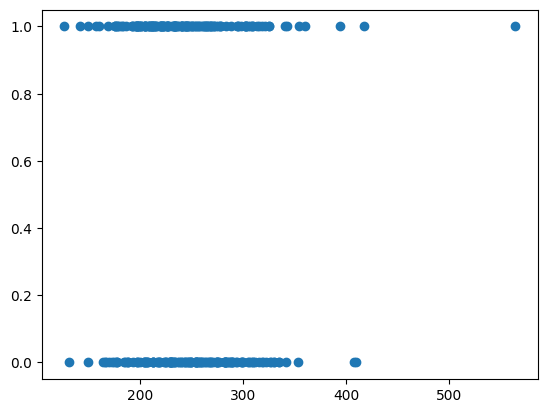

In [10]:
plt.scatter(x=data['chol'] ,y=data['target'])

### Data splitting

In [11]:
X = data.drop(columns='target', axis=1)
y = data['target']

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [16]:
X_train.shape

(242, 13)

In [17]:
y_train.shape

(242,)

### Model Training

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression(max_iter=100)

In [20]:
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

In [21]:
prediction = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy = accuracy_score(y_test, prediction)

In [24]:
print("Accuracy on the test data is ", accuracy*100, "%")

Accuracy on the test data is  81.9672131147541 %


#### Checking the model accuracy on different number of iterations

In [25]:
for n_iter in range(10,100,10):
    model = LogisticRegression(max_iter=n_iter)
    model.fit(X_train, y_train)    
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print(f"Accuracy on the test data with {n_iter} iterations is ", accuracy*100, "%")

Accuracy on the test data with 10 iterations is  68.85245901639344 %
Accuracy on the test data with 20 iterations is  65.57377049180327 %
Accuracy on the test data with 30 iterations is  65.57377049180327 %
Accuracy on the test data with 40 iterations is  83.60655737704919 %
Accuracy on the test data with 50 iterations is  85.24590163934425 %
Accuracy on the test data with 60 iterations is  83.60655737704919 %
Accuracy on the test data with 70 iterations is  83.60655737704919 %
Accuracy on the test data with 80 iterations is  81.9672131147541 %
Accuracy on the test data with 90 iterations is  81.9672131147541 %
